# Importing required Functions and libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

# Reading and Understanding the data

In [2]:
DF_Bike=pd.read_csv("day.csv")

In [3]:
DF_Bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
DF_Bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


From above command we can observe that none of the column is having null values

In [5]:
DF_Bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


# Exploratory Data Analysis(EDA)

In [6]:
#Dropping columns based on business requirement
DF_Bike1=DF_Bike.drop(['instant','dteday','casual','registered'], axis = 1)

In [7]:
DF_Bike1.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

<Figure size 1152x720 with 0 Axes>

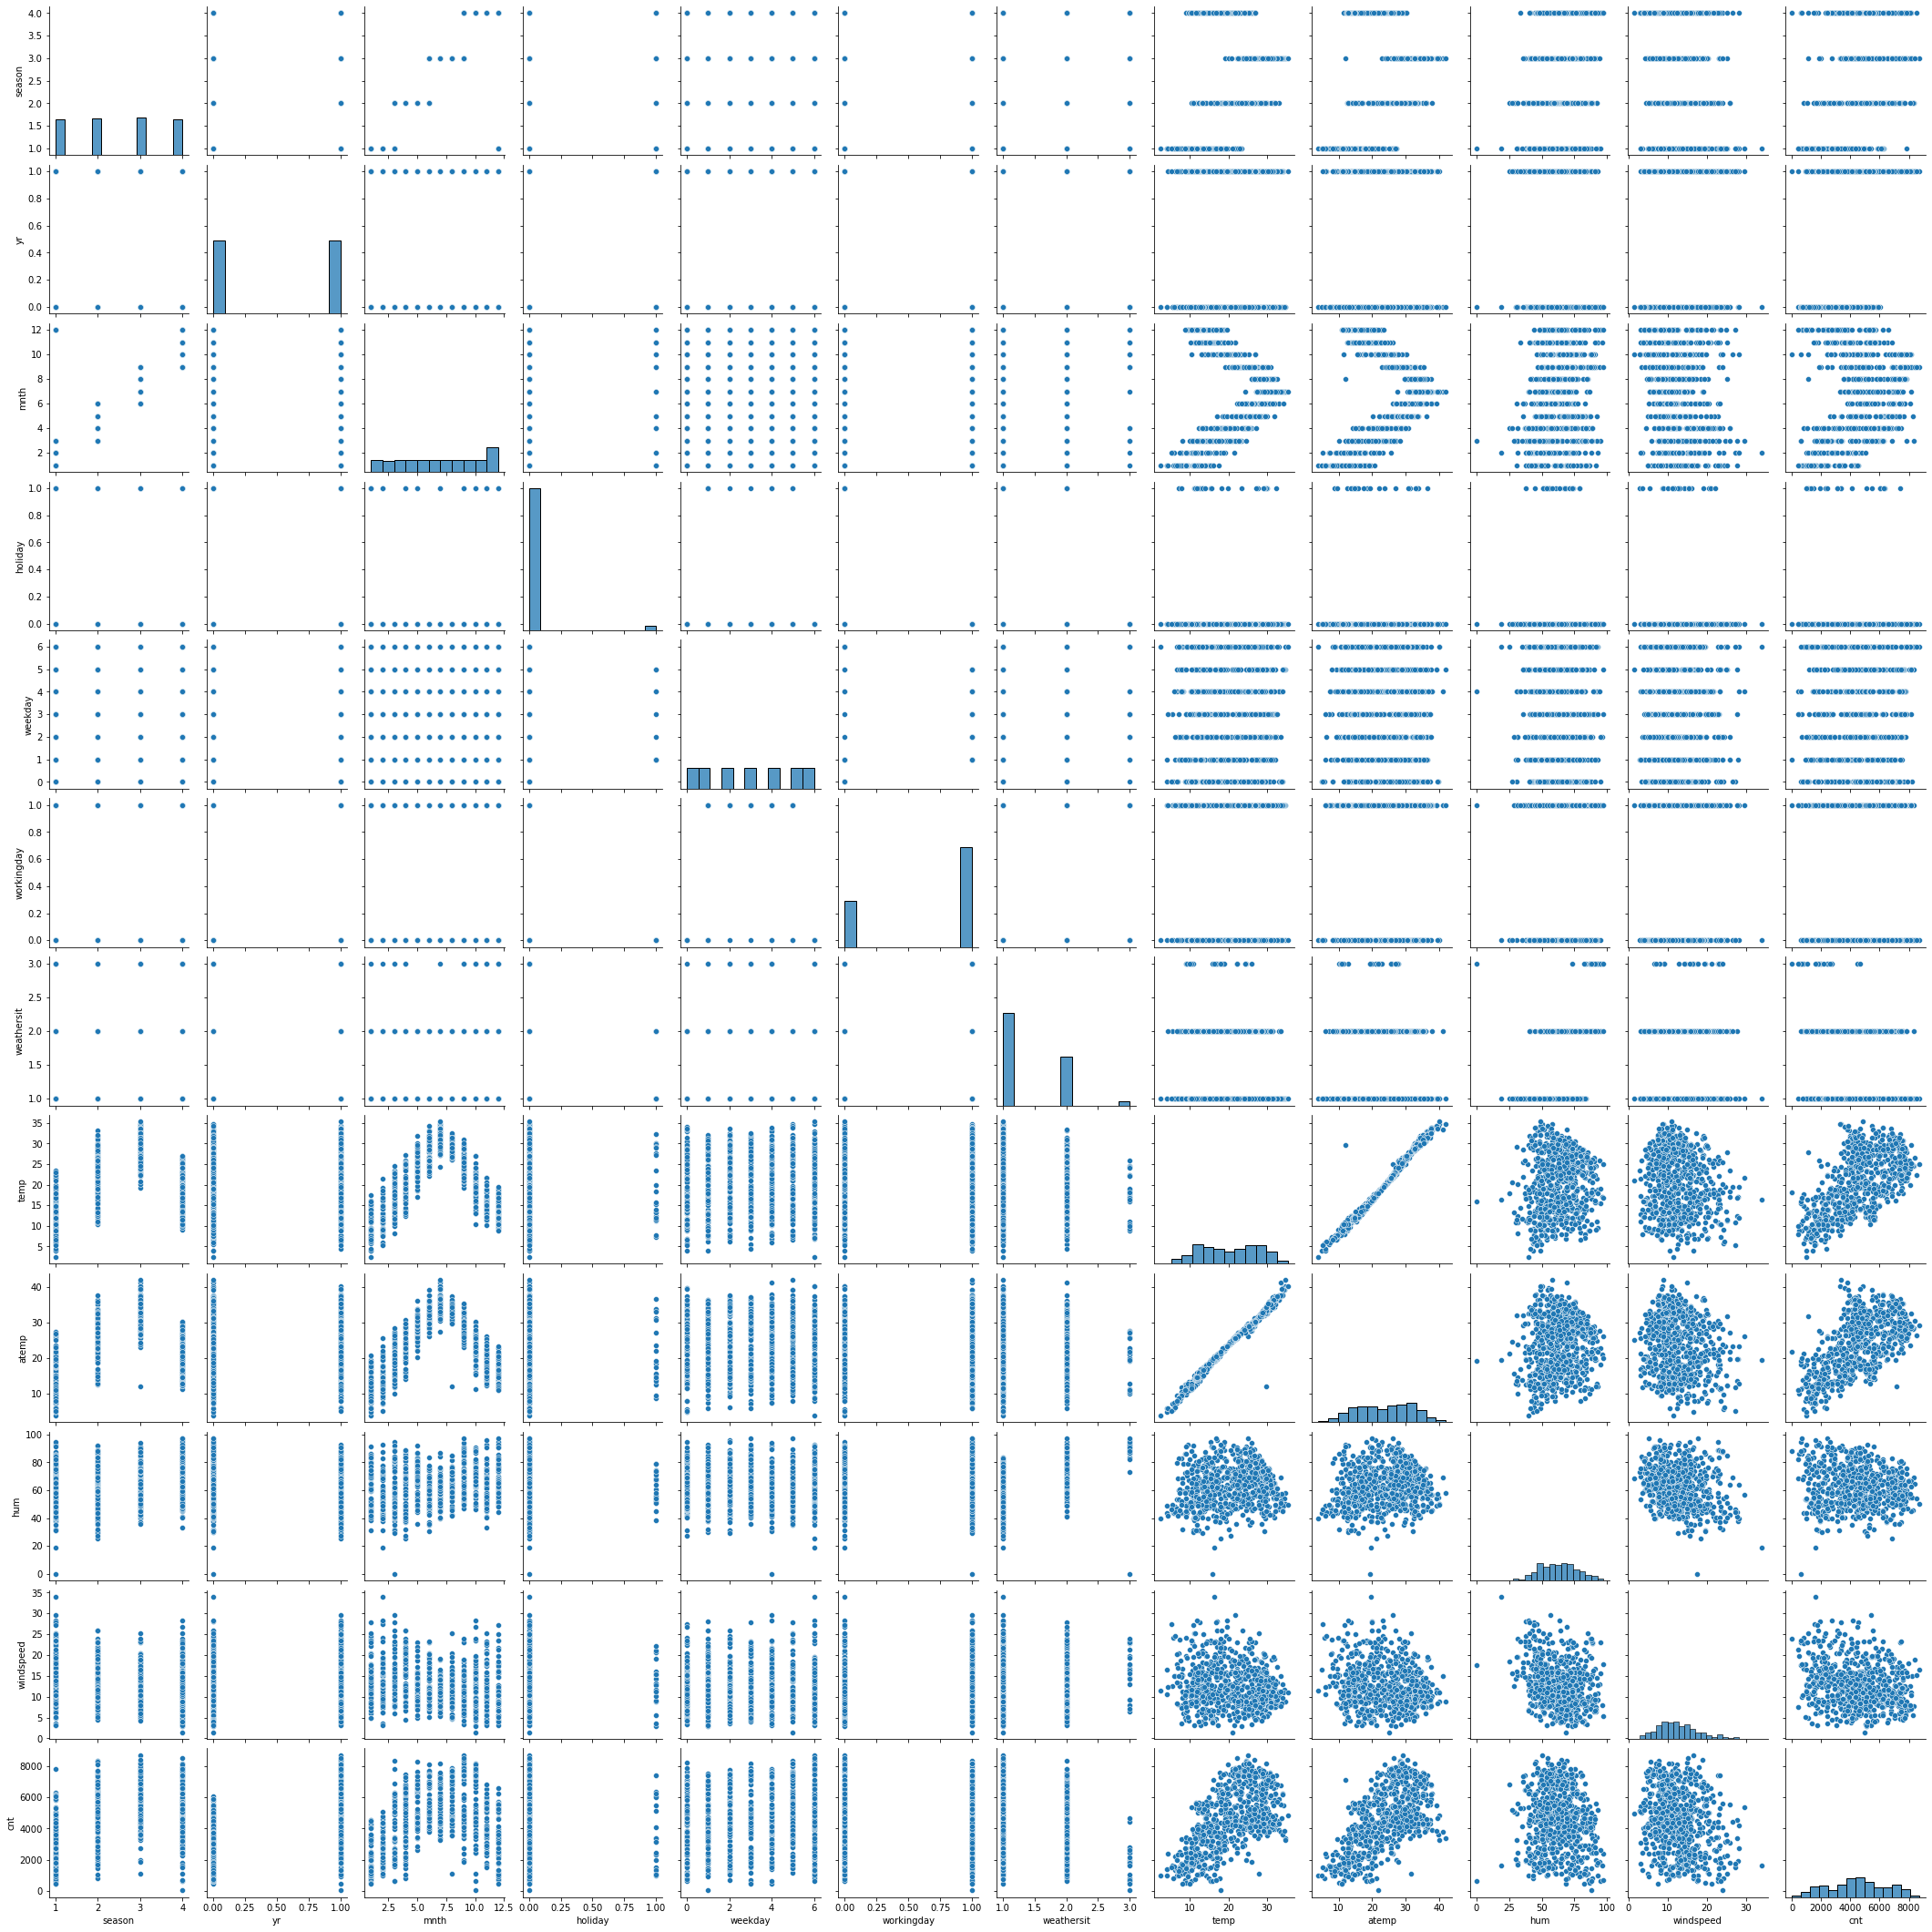

In [9]:
plt.figure(figsize=(16,10))

sns.pairplot(DF_Bike1)
plt.show()

From the above pairplot we can see that there is a liner relationship between (temp,atemp,hum) with respect to cnt

In [10]:
#updating categorical variables so it would be redable after converting to dummy variables 

DF_Bike1.season=DF_Bike1.season.apply(lambda x:"Spring" if  (x==1) else x)\
.apply(lambda x:"Summer" if  (x==2) else x)\
.apply(lambda x:"Fall" if  (x==3) else x)\
.apply(lambda x:"Winter" if  (x==4) else x)

DF_Bike1.weathersit=DF_Bike1.weathersit.apply(lambda x:"Very Good Weather" if  (x==1) else x)\
.apply(lambda x:"Good Weather" if  (x==2) else x)\
.apply(lambda x:"Bad Weather" if  (x==3) else x)\
.apply(lambda x:"Very Bad Weather" if  (x==4) else x)

DF_Bike1.mnth=DF_Bike1.mnth.apply(lambda x:"January" if  (x==1) else x)\
.apply(lambda x:"February" if  (x==2) else x)\
.apply(lambda x:"March" if  (x==3) else x)\
.apply(lambda x:"April" if  (x==4) else x)\
.apply(lambda x:"May" if  (x==5) else x)\
.apply(lambda x:"June" if  (x==6) else x)\
.apply(lambda x:"July" if  (x==7) else x)\
.apply(lambda x:"August" if  (x==8) else x)\
.apply(lambda x:"September" if  (x==9) else x)\
.apply(lambda x:"October" if  (x==10) else x)\
.apply(lambda x:"November" if  (x==11) else x)\
.apply(lambda x:"December" if  (x==12) else x)

DF_Bike1.weekday=DF_Bike1.weekday.apply(lambda x:"Monday" if  (x==1) else x)\
.apply(lambda x:"Tuesday" if  (x==2) else x)\
.apply(lambda x:"Wednesday" if  (x==3) else x)\
.apply(lambda x:"Thursday" if  (x==4) else x)\
.apply(lambda x:"Friday" if  (x==5) else x)\
.apply(lambda x:"Saturday" if  (x==6) else x)\
.apply(lambda x:"Sunday" if  (x==0) else x)

In [11]:
DF_Bike1.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,Spring,0,January,0,Saturday,0,Good Weather,14.110847,18.18125,80.5833,10.749882,985
1,Spring,0,January,0,Sunday,0,Good Weather,14.902598,17.68695,69.6087,16.652113,801
2,Spring,0,January,0,Monday,1,Very Good Weather,8.050924,9.47025,43.7273,16.636703,1349
3,Spring,0,January,0,Tuesday,1,Very Good Weather,8.200000,10.60610,59.0435,10.739832,1562
4,Spring,0,January,0,Wednesday,1,Very Good Weather,9.305237,11.46350,43.6957,12.522300,1600


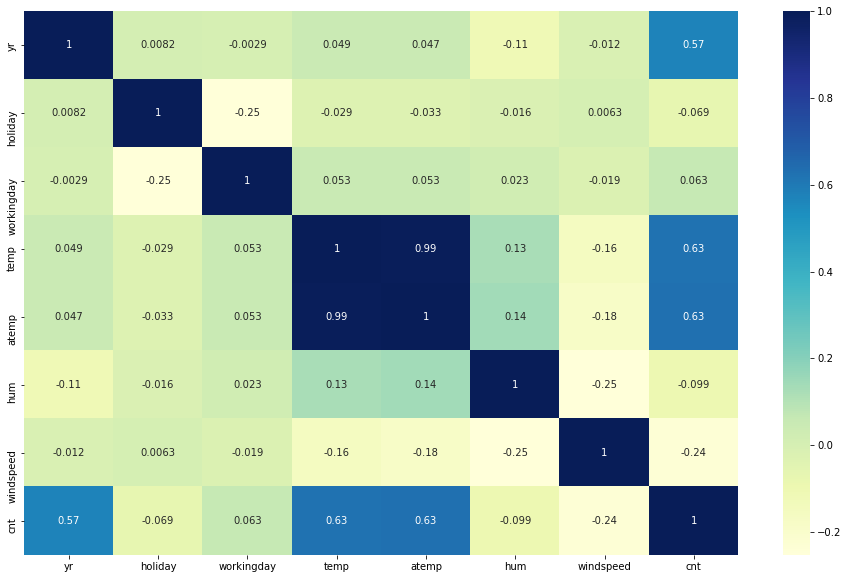

In [12]:
#heatmap 
plt.figure(figsize=(16,10))
sns.heatmap(DF_Bike1.corr(),annot=True, cmap="YlGnBu")
plt.show()

In [13]:
# Dropping atemp since the correlation between atemp and temp is 99%
DF_Bike2=DF_Bike1.drop(['atemp'], axis = 1)

In [14]:
DF_Bike2.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,Spring,0,January,0,Saturday,0,Good Weather,14.110847,80.5833,10.749882,985
1,Spring,0,January,0,Sunday,0,Good Weather,14.902598,69.6087,16.652113,801
2,Spring,0,January,0,Monday,1,Very Good Weather,8.050924,43.7273,16.636703,1349
3,Spring,0,January,0,Tuesday,1,Very Good Weather,8.200000,59.0435,10.739832,1562
4,Spring,0,January,0,Wednesday,1,Very Good Weather,9.305237,43.6957,12.522300,1600


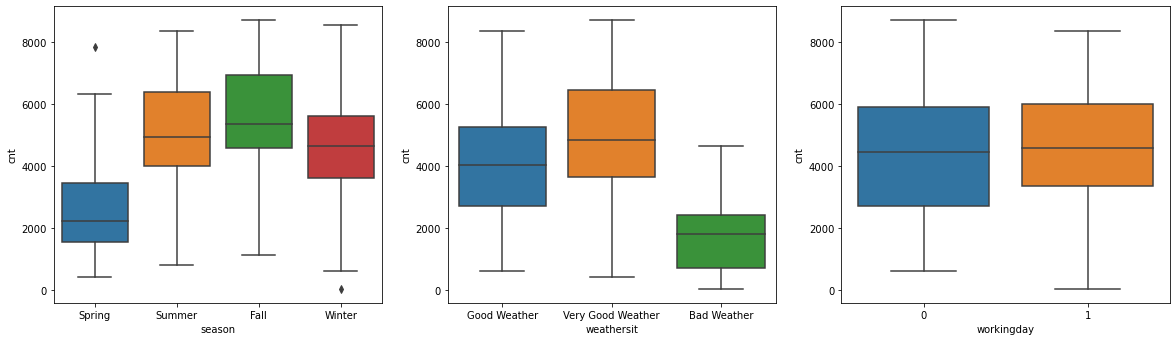

In [15]:
#plotting barplots for further analysis
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = DF_Bike2)
plt.subplot(2,3,2)
sns.boxplot(x = 'weathersit', y = 'cnt', data = DF_Bike2)
plt.subplot(2,3,3)
sns.boxplot(x = 'workingday', y = 'cnt', data = DF_Bike2)
plt.show()

From the above bar plot we can clearly see that if season is spring or if weather is bad then bikes rented were very less and not much difference in holiday vs working day

<AxesSubplot:xlabel='mnth', ylabel='cnt'>

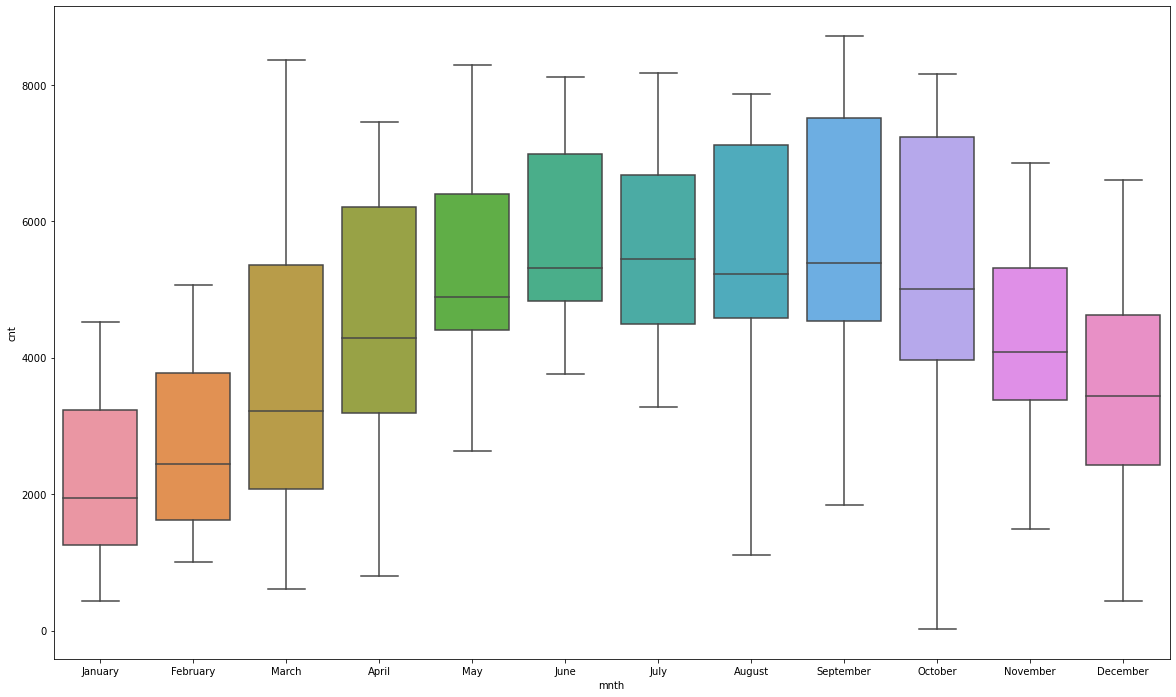

In [16]:
plt.figure(figsize=(20, 12))
sns.boxplot(x = 'mnth', y = 'cnt', data = DF_Bike2)

From above boxplot we can see that most bikes were rented in september month and least in january

<AxesSubplot:xlabel='weekday', ylabel='cnt'>

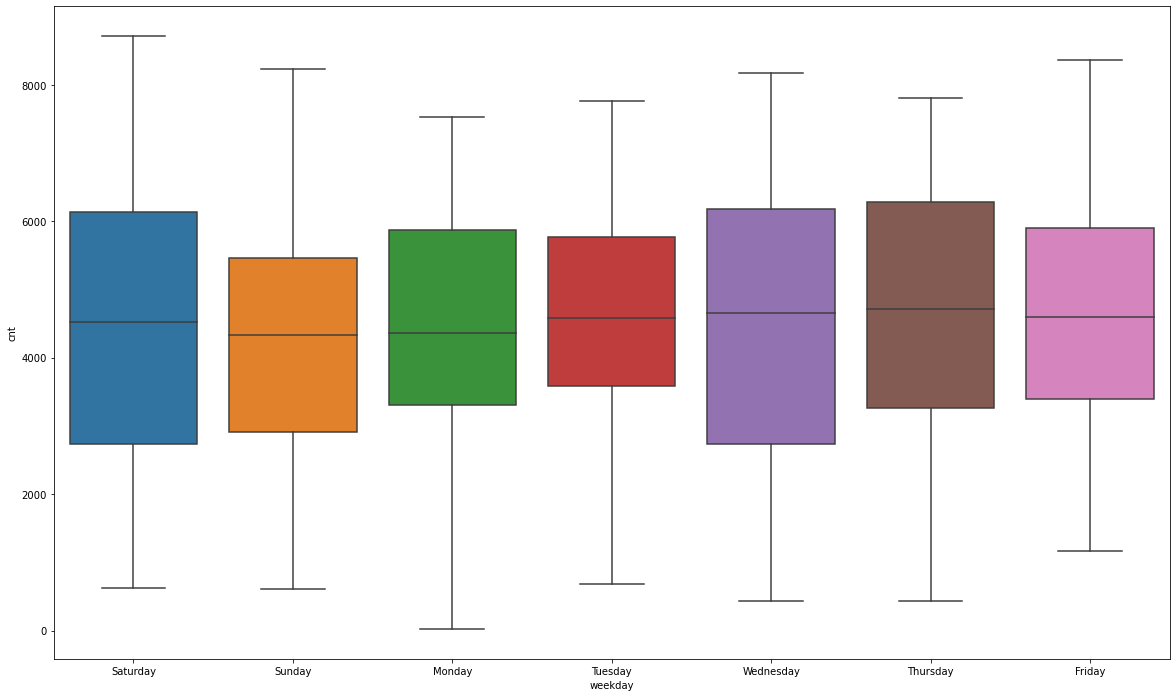

In [17]:
plt.figure(figsize=(20, 12))
sns.boxplot(x = 'weekday', y = 'cnt', data = DF_Bike2)

<AxesSubplot:xlabel='yr', ylabel='cnt'>

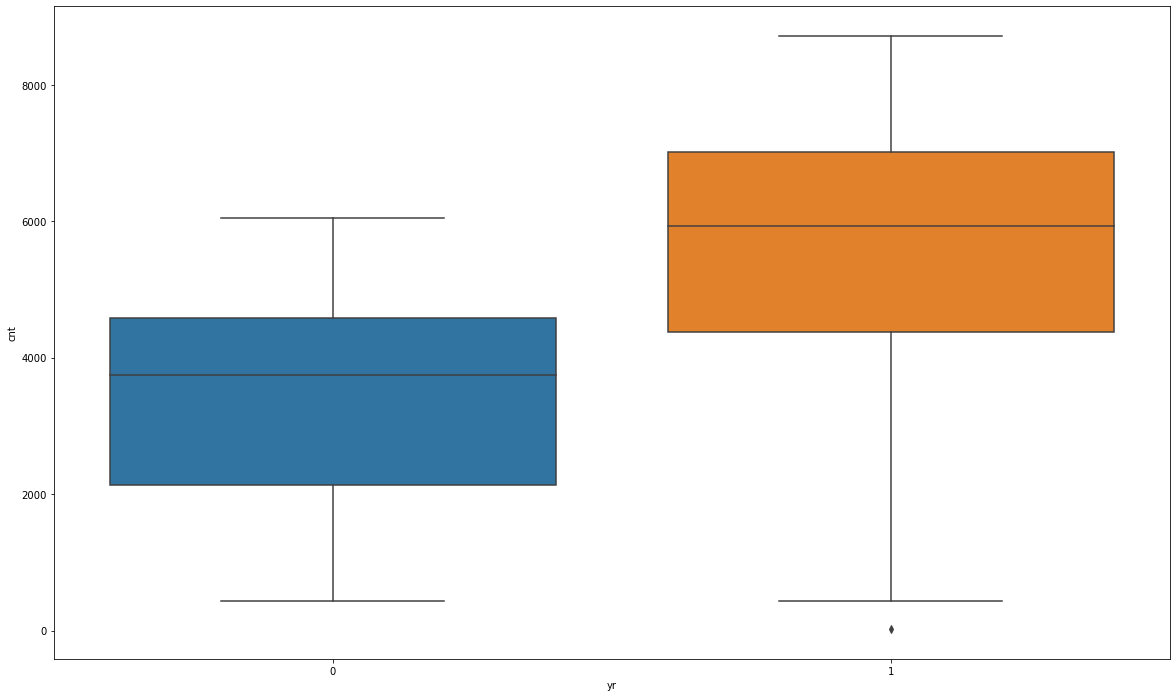

In [87]:
plt.figure(figsize=(20, 12))
sns.boxplot(x = 'yr', y = 'cnt', data = DF_Bike2)

# Preparing the data for modeling
- Dummy Variables for categorical columns
- Scaling numerical variables

In [18]:
DF_Bike2.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,Spring,0,January,0,Saturday,0,Good Weather,14.110847,80.5833,10.749882,985
1,Spring,0,January,0,Sunday,0,Good Weather,14.902598,69.6087,16.652113,801
2,Spring,0,January,0,Monday,1,Very Good Weather,8.050924,43.7273,16.636703,1349
3,Spring,0,January,0,Tuesday,1,Very Good Weather,8.200000,59.0435,10.739832,1562
4,Spring,0,January,0,Wednesday,1,Very Good Weather,9.305237,43.6957,12.522300,1600


# Dummy Variables for categorical columns

In [19]:
# Creating Dummy variables for season
dummy1=pd.get_dummies(DF_Bike2.season,drop_first=True)
dummy1.head()

,Spring,Summer,Winter
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [20]:
#concat dummy_1 df with original df and dropping season column
DF_Bike4=pd.concat([DF_Bike2,dummy1], axis=1)

DF_Bike4=DF_Bike4.drop("season",axis=1)

DF_Bike4.head()

,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,Spring,Summer,Winter
0,0,January,0,Saturday,0,Good Weather,14.110847,80.5833,10.749882,985,1,0,0
1,0,January,0,Sunday,0,Good Weather,14.902598,69.6087,16.652113,801,1,0,0
2,0,January,0,Monday,1,Very Good Weather,8.050924,43.7273,16.636703,1349,1,0,0
3,0,January,0,Tuesday,1,Very Good Weather,8.200000,59.0435,10.739832,1562,1,0,0
4,0,January,0,Wednesday,1,Very Good Weather,9.305237,43.6957,12.522300,1600,1,0,0


In [21]:
# Creating Dummy variables for mnth
dummy2=pd.get_dummies(DF_Bike2.mnth,drop_first=True)
dummy2.head()

,August,December,February,January,July,June,March,May,November,October,September
0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0


In [22]:
#concat dummy_2 df with original df
DF_Bike4=pd.concat([DF_Bike4,dummy2], axis=1)

DF_Bike4=DF_Bike4.drop("mnth",axis=1)

DF_Bike4.head()

,yr,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,Spring,...,December,February,January,July,June,March,May,November,October,September
0,0,0,Saturday,0,Good Weather,14.110847,80.5833,10.749882,985,1,...,0,0,1,0,0,0,0,0,0,0
1,0,0,Sunday,0,Good Weather,14.902598,69.6087,16.652113,801,1,...,0,0,1,0,0,0,0,0,0,0
2,0,0,Monday,1,Very Good Weather,8.050924,43.7273,16.636703,1349,1,...,0,0,1,0,0,0,0,0,0,0
3,0,0,Tuesday,1,Very Good Weather,8.200000,59.0435,10.739832,1562,1,...,0,0,1,0,0,0,0,0,0,0
4,0,0,Wednesday,1,Very Good Weather,9.305237,43.6957,12.522300,1600,1,...,0,0,1,0,0,0,0,0,0,0


In [23]:
# Creating Dummy variables for weekday

dummy3=pd.get_dummies(DF_Bike2.weekday,drop_first=True)
dummy3.head()


,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,0,1,0,0,0,0
1,0,0,1,0,0,0
2,1,0,0,0,0,0
3,0,0,0,0,1,0
4,0,0,0,0,0,1


In [24]:
#concat dummy_3 df with original df
DF_Bike4=pd.concat([DF_Bike4,dummy3], axis=1)

DF_Bike4=DF_Bike4.drop("weekday",axis=1)

DF_Bike4.head()

,yr,holiday,workingday,weathersit,temp,hum,windspeed,cnt,Spring,Summer,...,May,November,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,0,0,0,Good Weather,14.110847,80.5833,10.749882,985,1,0,...,0,0,0,0,0,1,0,0,0,0
1,0,0,0,Good Weather,14.902598,69.6087,16.652113,801,1,0,...,0,0,0,0,0,0,1,0,0,0
2,0,0,1,Very Good Weather,8.050924,43.7273,16.636703,1349,1,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,1,Very Good Weather,8.200000,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,1,Very Good Weather,9.305237,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,0,0,1


In [25]:
# Creating Dummy variables for weathersit

dummy4=pd.get_dummies(DF_Bike2.weathersit)

"""if I use drop first then Very good weather column is getting dropped but from my initial analysis 
in Bad Weather less bikes were rented so I dropped Bad Weather"""

dummy4=dummy4.drop(['Bad Weather'], axis = 1)

dummy4.head()


,Good Weather,Very Good Weather
0,1,0
1,1,0
2,0,1
3,0,1
4,0,1


In [26]:
#concat dummy_2 df with original df
DF_Bike4=pd.concat([DF_Bike4,dummy4], axis=1)

DF_Bike4=DF_Bike4.drop("weathersit",axis=1)

DF_Bike4.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,Spring,Summer,Winter,...,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Good Weather,Very Good Weather
0,0,0,0,14.110847,80.5833,10.749882,985,1,0,0,...,0,0,0,1,0,0,0,0,1,0
1,0,0,0,14.902598,69.6087,16.652113,801,1,0,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,1,8.050924,43.7273,16.636703,1349,1,0,0,...,0,0,1,0,0,0,0,0,0,1
3,0,0,1,8.200000,59.0435,10.739832,1562,1,0,0,...,0,0,0,0,0,0,1,0,0,1
4,0,0,1,9.305237,43.6957,12.522300,1600,1,0,0,...,0,0,0,0,0,0,0,1,0,1


# Splitting into train and test

In [27]:
df_train,df_test=train_test_split(DF_Bike4,train_size=0.71,random_state=100)
print(df_train.shape)
print(df_test.shape)

(518, 29)
(212, 29)


In [28]:
DF_Bike4.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,Spring,Summer,Winter,...,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Good Weather,Very Good Weather
0,0,0,0,14.110847,80.5833,10.749882,985,1,0,0,...,0,0,0,1,0,0,0,0,1,0
1,0,0,0,14.902598,69.6087,16.652113,801,1,0,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,1,8.050924,43.7273,16.636703,1349,1,0,0,...,0,0,1,0,0,0,0,0,0,1
3,0,0,1,8.200000,59.0435,10.739832,1562,1,0,0,...,0,0,0,0,0,0,1,0,0,1
4,0,0,1,9.305237,43.6957,12.522300,1600,1,0,0,...,0,0,0,0,0,0,0,1,0,1


In [29]:
#Initiate an object 
scaler=MinMaxScaler()

#Create a list of numeric variables
num_vars=['temp','hum','windspeed','cnt']

#Fit data
df_train[num_vars]=scaler.fit_transform(df_train[num_vars])
df_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,Spring,Summer,Winter,...,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Good Weather,Very Good Weather
287,0,0,0,0.557653,0.498067,0.463882,0.597676,0,0,1,...,1,0,0,1,0,0,0,0,0,1
641,1,0,1,0.745598,0.744955,0.161755,0.840543,0,0,1,...,1,0,0,0,0,1,0,0,1,0
400,1,0,0,0.257562,0.708888,0.287411,0.336516,1,0,0,...,0,0,0,0,1,0,0,0,1,0
702,1,0,1,0.519232,0.756118,0.283397,0.757478,0,0,1,...,0,0,0,0,0,0,1,0,0,1
127,0,0,0,0.584649,0.650923,0.069510,0.495973,0,1,0,...,0,0,0,0,1,0,0,0,0,1


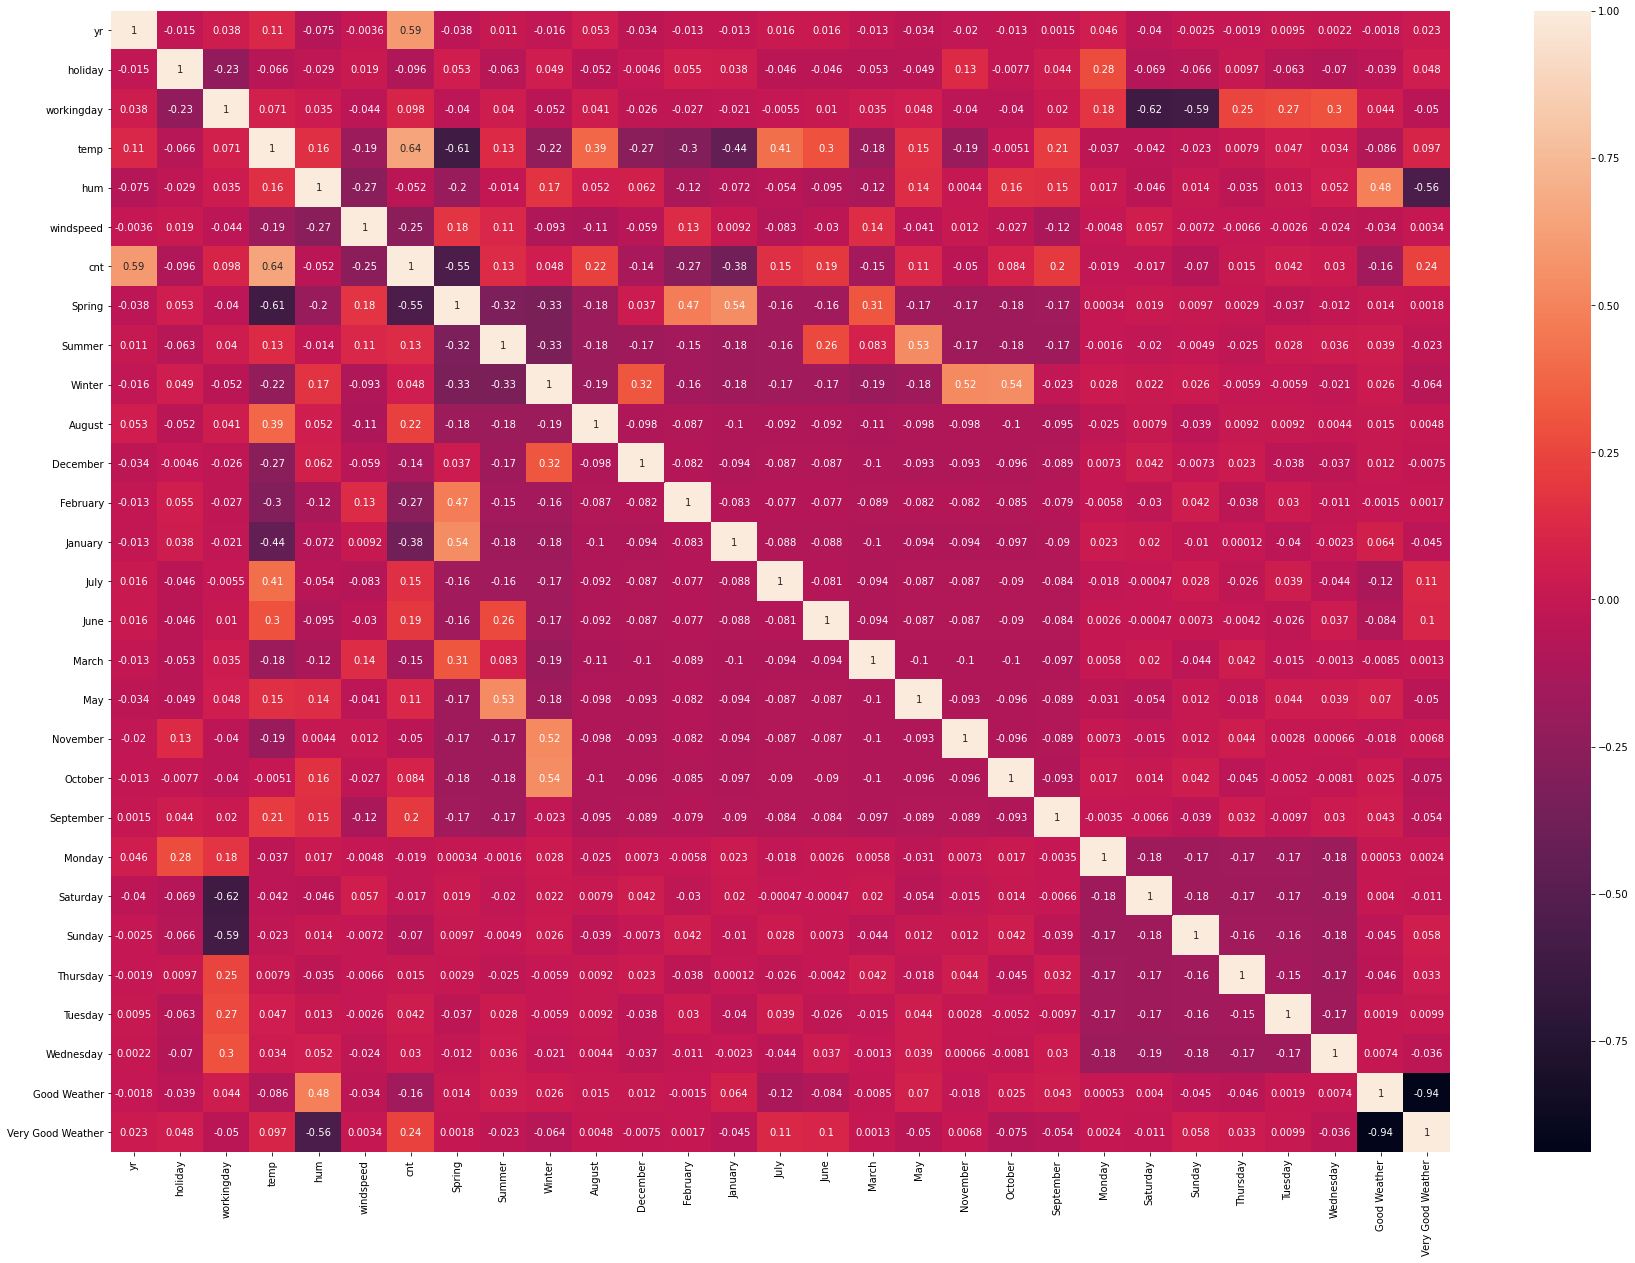

In [30]:
#heatmap
plt.figure(figsize=(30,21))
sns.heatmap(df_train.corr(),annot=True)
plt.show()

In [31]:
#X_train and y_train
y_train=df_train.pop('cnt')
X_train=df_train

In [32]:
X_train.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'Spring',
       'Summer', 'Winter', 'August', 'December', 'February', 'January', 'July',
       'June', 'March', 'May', 'November', 'October', 'September', 'Monday',
       'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday',
       'Good Weather', 'Very Good Weather'],
      dtype='object')

# Model-1 (Using single variable)

In [33]:
# add constant
X_train_sm=sm.add_constant(X_train['September'])
#Above we are only using area as predictor

#Create first model
lr=sm.OLS(y_train,X_train_sm)

#Fit
lr_model=lr.fit()

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.039
Model:                            OLS   Adj. R-squared:                  0.037
Method:                 Least Squares   F-statistic:                     20.88
Date:                Wed, 12 Jan 2022   Prob (F-statistic):           6.12e-06
Time:                        11:34:24   Log-Likelihood:                 48.501
No. Observations:                 518   AIC:                            -93.00
Df Residuals:                     516   BIC:                            -84.50
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5022      0.010     49.683      0.000       0.482       0.522
September      0.1642      0.036      4.570      0.000       0.094       0.235
==============================================================================
Omnibus:                       59.127   Durbin-Watson:                   1.927
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.135
Skew:                          -0.067   Prob(JB):                     0.000190
Kurtosis:                       2.119   Cond. No.                         3.73
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

I have trained the model in simple liner regression but r2 is very less for individual vatiables

# Model-2 (Using all variable)

In [34]:
X_train_sm=sm.add_constant(X_train)


#Create the model
lr=sm.OLS(y_train,X_train_sm)

#Fit
lr_model=lr.fit()

#summary
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     106.6
Date:                Wed, 12 Jan 2022   Prob (F-statistic):          6.99e-186
Time:                        11:34:24   Log-Likelihood:                 537.43
No. Observations:                 518   AIC:                            -1019.
Df Residuals:                     490   BIC:                            -899.9
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.0339      0.043      0.792      0.428      -0.050       0.118
yr                    0.2334      0.008     29.263      0.000       0.218       0.249
holiday              -0.0420      0.025     -1.690      0.092      -0.091       0.007
workingday            0.0436      0.014      3.212      0.001       0.017       0.070
temp                  0.4527      0.045      9.972      0.000       0.364       0.542
hum                  -0.1531      0.038     -4.008      0.000      -0.228      -0.078
windspeed            -0.1852      0.025     -7.291      0.000      -0.235      -0.135
Spring               -0.0468      0.030     -1.572      0.117      -0.105       0.012
Summer                0.0435      0.026      1.674      0.095      -0.008       0.095
Winter                0.1079      0.028      3.883      0.000       0.053       0.162
August                0.0188      0.033      0.564      0.573      -0.047       0.084
December             -0.0399      0.033     -1.198      0.231      -0.105       0.026
February             -0.0283      0.033     -0.868      0.386      -0.092       0.036
January              -0.0584      0.033     -1.758      0.079      -0.124       0.007
July                 -0.0358      0.035     -1.033      0.302      -0.104       0.032
June                  0.0030      0.025      0.121      0.903      -0.045       0.051
March                 0.0022      0.024      0.091      0.927      -0.046       0.050
May                   0.0237      0.021      1.140      0.255      -0.017       0.065
November             -0.0385      0.036     -1.066      0.287      -0.110       0.032
October               0.0135      0.035      0.381      0.703      -0.056       0.083
September             0.0854      0.032      2.691      0.007       0.023       0.148
Monday               -0.0221      0.015     -1.455      0.146      -0.052       0.008
Saturday              0.0437      0.015      2.975      0.003       0.015       0.073
Sunday               -0.0114      0.015     -0.752      0.452      -0.041       0.018
Thursday             -0.0086      0.015     -0.558      0.577      -0.039       0.022
Tuesday              -0.0153      0.015     -0.998      0.319      -0.045       0.015
Wednesday            -0.0049      0.015     -0.328      0.743      -0.034       0.024
Good Weather          0.1977      0.025      7.955      0.000       0.149       0.247
Very Good Weather     0.2572      0.026      9.801      0.000       0.206       0.309
==============================================================================
Omnibus:                       88.636   Durbin-Watson:                   2.046
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              253.593
Skew:                          -0.822   Prob(JB):                     8.57e-56
Kurtosis:      

In [35]:
vif=pd.DataFrame()
vif['Features']=X_train.columns
vif['VIF']=[variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by="VIF",ascending=False)
vif

,Features,VIF
2,workingday,128.35
21,Saturday,29.16
22,Sunday,27.93
6,Spring,10.87
27,Very Good Weather,10.75
8,Winter,9.72
26,Good Weather,9.31
7,Summer,8.34
3,temp,6.94
18,October,6.89


# Model-3 (Dropping March because of high p-value:0.927)

In [36]:
X_train_2=X_train.drop(["March"],axis=1)

In [37]:
X_train_sm=sm.add_constant(X_train_2)


#Create the model
lr=sm.OLS(y_train,X_train_sm)

#Fit
lr_model=lr.fit()

#summary
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     110.9
Date:                Wed, 12 Jan 2022   Prob (F-statistic):          6.60e-187
Time:                        11:34:25   Log-Likelihood:                 537.43
No. Observations:                 518   AIC:                            -1021.
Df Residuals:                     491   BIC:                            -906.1
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.0350      0.041      0.855      0.393      -0.045       0.116
yr                    0.2334      0.008     29.292      0.000       0.218       0.249
holiday              -0.0417      0.025     -1.692      0.091      -0.090       0.007
workingday            0.0439      0.013      3.334      0.001       0.018       0.070
temp                  0.4521      0.045     10.102      0.000       0.364       0.540
hum                  -0.1528      0.038     -4.017      0.000      -0.228      -0.078
windspeed            -0.1854      0.025     -7.312      0.000      -0.235      -0.136
Spring               -0.0459      0.028     -1.630      0.104      -0.101       0.009
Summer                0.0431      0.025      1.691      0.092      -0.007       0.093
Winter                0.1083      0.027      3.974      0.000       0.055       0.162
August                0.0178      0.031      0.567      0.571      -0.044       0.079
December             -0.0419      0.026     -1.628      0.104      -0.092       0.009
February             -0.0305      0.022     -1.393      0.164      -0.073       0.013
January              -0.0607      0.022     -2.760      0.006      -0.104      -0.017
July                 -0.0368      0.033     -1.117      0.265      -0.102       0.028
June                  0.0023      0.023      0.097      0.923      -0.043       0.048
May                   0.0230      0.019      1.186      0.236      -0.015       0.061
November             -0.0403      0.031     -1.320      0.187      -0.100       0.020
October               0.0118      0.030      0.391      0.696      -0.047       0.071
September             0.0842      0.029      2.929      0.004       0.028       0.141
Monday               -0.0221      0.015     -1.456      0.146      -0.052       0.008
Saturday              0.0440      0.014      3.083      0.002       0.016       0.072
Sunday               -0.0112      0.015     -0.749      0.454      -0.040       0.018
Thursday             -0.0085      0.015     -0.555      0.579      -0.039       0.022
Tuesday              -0.0153      0.015     -0.999      0.318      -0.045       0.015
Wednesday            -0.0048      0.015     -0.327      0.743      -0.034       0.024
Good Weather          0.1977      0.025      7.962      0.000       0.149       0.246
Very Good Weather     0.2572      0.026      9.811      0.000       0.206       0.309
==============================================================================
Omnibus:                       88.583   Durbin-Watson:                   2.045
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              253.955
Skew:                          -0.821   Prob(JB):                     7.15e-56
Kurtosis:                       6.012   Cond. No.                     1.46e+16
======================

# Model-4 (Dropping June because of high p-value:0.923)

In [38]:
X_train_3=X_train_2.drop(["June"],axis=1)

X_train_sm=sm.add_constant(X_train_3)


#Create the model
lr=sm.OLS(y_train,X_train_sm)

#Fit
lr_model=lr.fit()

#summary
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     115.6
Date:                Wed, 12 Jan 2022   Prob (F-statistic):          6.10e-188
Time:                        11:34:25   Log-Likelihood:                 537.42
No. Observations:                 518   AIC:                            -1023.
Df Residuals:                     492   BIC:                            -912.3
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.0354      0.041      0.867      0.386      -0.045       0.115
yr                    0.2333      0.008     29.465      0.000       0.218       0.249
holiday              -0.0418      0.025     -1.696      0.091      -0.090       0.007
workingday            0.0440      0.013      3.352      0.001       0.018       0.070
temp                  0.4543      0.038     11.931      0.000       0.380       0.529
hum                  -0.1532      0.038     -4.055      0.000      -0.227      -0.079
windspeed            -0.1856      0.025     -7.359      0.000      -0.235      -0.136
Spring               -0.0468      0.027     -1.751      0.081      -0.099       0.006
Summer                0.0425      0.025      1.722      0.086      -0.006       0.091
Winter                0.1078      0.027      4.031      0.000       0.055       0.160
August                0.0159      0.025      0.643      0.520      -0.033       0.065
December             -0.0421      0.026     -1.643      0.101      -0.092       0.008
February             -0.0303      0.022     -1.391      0.165      -0.073       0.013
January              -0.0604      0.022     -2.780      0.006      -0.103      -0.018
July                 -0.0388      0.026     -1.514      0.131      -0.089       0.012
May                   0.0221      0.017      1.293      0.197      -0.012       0.056
November             -0.0407      0.030     -1.350      0.178      -0.100       0.019
October               0.0111      0.029      0.380      0.704      -0.046       0.068
September             0.0827      0.024      3.409      0.001       0.035       0.130
Monday               -0.0221      0.015     -1.456      0.146      -0.052       0.008
Saturday              0.0441      0.014      3.112      0.002       0.016       0.072
Sunday               -0.0110      0.015     -0.744      0.457      -0.040       0.018
Thursday             -0.0086      0.015     -0.557      0.578      -0.039       0.022
Tuesday              -0.0153      0.015     -1.001      0.317      -0.045       0.015
Wednesday            -0.0048      0.015     -0.326      0.744      -0.034       0.024
Good Weather          0.1977      0.025      7.970      0.000       0.149       0.246
Very Good Weather     0.2571      0.026      9.821      0.000       0.206       0.309
==============================================================================
Omnibus:                       88.302   Durbin-Watson:                   2.045
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              252.087
Skew:                          -0.820   Prob(JB):                     1.82e-55
Kurtosis:                       5.998   Cond. No.                     1.29e+16
==============================================================================

Notes:
[1] Standard Errors a

In [39]:
vif=pd.DataFrame()
vif['Features']=X_train_3.columns
vif['VIF']=[variance_inflation_factor(X_train_3.values,i) for i in range(X_train_3.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by="VIF",ascending=False)
vif

,Features,VIF
2,workingday,116.71
19,Saturday,26.39
20,Sunday,25.50
25,Very Good Weather,10.75
24,Good Weather,9.31
8,Winter,9.05
6,Spring,8.79
7,Summer,7.52
1,holiday,5.73
3,temp,4.90


# Model-5 (Dropping Wednesday because of high p-value:0.744)

In [40]:
X_train_4=X_train_3.drop(["Wednesday"],axis=1)

X_train_sm=sm.add_constant(X_train_4)


#Create the model
lr=sm.OLS(y_train,X_train_sm)

#Fit
lr_model=lr.fit()

#summary
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     120.6
Date:                Wed, 12 Jan 2022   Prob (F-statistic):          5.79e-189
Time:                        11:34:25   Log-Likelihood:                 537.37
No. Observations:                 518   AIC:                            -1025.
Df Residuals:                     493   BIC:                            -918.5
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.0343      0.041      0.845      0.399      -0.045       0.114
yr                    0.2333      0.008     29.490      0.000       0.218       0.249
holiday              -0.0432      0.024     -1.780      0.076      -0.091       0.004
workingday            0.0423      0.012      3.505      0.000       0.019       0.066
temp                  0.4539      0.038     11.937      0.000       0.379       0.529
hum                  -0.1537      0.038     -4.075      0.000      -0.228      -0.080
windspeed            -0.1855      0.025     -7.363      0.000      -0.235      -0.136
Spring               -0.0469      0.027     -1.759      0.079      -0.099       0.005
Summer                0.0423      0.025      1.718      0.086      -0.006       0.091
Winter                0.1078      0.027      4.032      0.000       0.055       0.160
August                0.0160      0.025      0.649      0.517      -0.033       0.065
December             -0.0420      0.026     -1.642      0.101      -0.092       0.008
February             -0.0303      0.022     -1.391      0.165      -0.073       0.012
January              -0.0605      0.022     -2.786      0.006      -0.103      -0.018
July                 -0.0385      0.026     -1.506      0.133      -0.089       0.012
May                   0.0222      0.017      1.298      0.195      -0.011       0.056
November             -0.0410      0.030     -1.359      0.175      -0.100       0.018
October               0.0111      0.029      0.381      0.703      -0.046       0.068
September             0.0826      0.024      3.409      0.001       0.035       0.130
Monday               -0.0194      0.013     -1.520      0.129      -0.045       0.006
Saturday              0.0451      0.014      3.263      0.001       0.018       0.072
Sunday               -0.0100      0.014     -0.691      0.490      -0.038       0.018
Thursday             -0.0059      0.013     -0.453      0.651      -0.031       0.020
Tuesday              -0.0126      0.013     -0.980      0.327      -0.038       0.013
Good Weather          0.1984      0.025      8.046      0.000       0.150       0.247
Very Good Weather     0.2577      0.026      9.875      0.000       0.206       0.309
==============================================================================
Omnibus:                       87.869   Durbin-Watson:                   2.042
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              250.899
Skew:                          -0.816   Prob(JB):                     3.30e-55
Kurtosis:                       5.994   Cond. No.                     1.28e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smalles

# Model-6 (Dropping October because of high p-value:0.703)

In [41]:
X_train_5=X_train_4.drop(["October"],axis=1)

X_train_sm=sm.add_constant(X_train_5)


#Create the model
lr=sm.OLS(y_train,X_train_sm)

#Fit
lr_model=lr.fit()

#summary
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.848
Method:                 Least Squares   F-statistic:                     126.0
Date:                Wed, 12 Jan 2022   Prob (F-statistic):          5.48e-190
Time:                        11:34:25   Log-Likelihood:                 537.29
No. Observations:                 518   AIC:                            -1027.
Df Residuals:                     494   BIC:                            -924.6
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.0368      0.040      0.919      0.359      -0.042       0.116
yr                    0.2332      0.008     29.513      0.000       0.218       0.249
holiday              -0.0419      0.024     -1.746      0.082      -0.089       0.005
workingday            0.0427      0.012      3.547      0.000       0.019       0.066
temp                  0.4529      0.038     11.951      0.000       0.378       0.527
hum                  -0.1520      0.037     -4.062      0.000      -0.226      -0.078
windspeed            -0.1850      0.025     -7.360      0.000      -0.234      -0.136
Spring               -0.0483      0.026     -1.830      0.068      -0.100       0.004
Summer                0.0391      0.023      1.690      0.092      -0.006       0.085
Winter                0.1133      0.022      5.064      0.000       0.069       0.157
August                0.0131      0.023      0.558      0.577      -0.033       0.059
December             -0.0490      0.018     -2.749      0.006      -0.084      -0.014
February             -0.0324      0.021     -1.538      0.125      -0.074       0.009
January              -0.0626      0.021     -2.989      0.003      -0.104      -0.021
July                 -0.0414      0.024     -1.690      0.092      -0.089       0.007
May                   0.0222      0.017      1.298      0.195      -0.011       0.056
November             -0.0500      0.019     -2.687      0.007      -0.087      -0.013
September             0.0782      0.021      3.674      0.000       0.036       0.120
Monday               -0.0196      0.013     -1.534      0.126      -0.045       0.005
Saturday              0.0455      0.014      3.302      0.001       0.018       0.073
Sunday               -0.0095      0.014     -0.663      0.508      -0.038       0.019
Thursday             -0.0058      0.013     -0.453      0.651      -0.031       0.019
Tuesday              -0.0127      0.013     -0.985      0.325      -0.038       0.013
Good Weather          0.1981      0.025      8.045      0.000       0.150       0.247
Very Good Weather     0.2575      0.026      9.877      0.000       0.206       0.309
==============================================================================
Omnibus:                       86.766   Durbin-Watson:                   2.041
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              245.380
Skew:                          -0.809   Prob(JB):                     5.20e-54
Kurtosis:                       5.958   Cond. No.                     1.31e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.03e-29. This might indicate that there are
strong multicollinearity 

# Model-7 (Dropping Thursday because of high p-value:0.651)

In [42]:
X_train_6=X_train_5.drop(["Thursday"],axis=1)

X_train_sm=sm.add_constant(X_train_6)


#Create the model
lr=sm.OLS(y_train,X_train_sm)

#Fit
lr_model=lr.fit()

#summary
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.848
Method:                 Least Squares   F-statistic:                     132.0
Date:                Wed, 12 Jan 2022   Prob (F-statistic):          5.22e-191
Time:                        11:34:25   Log-Likelihood:                 537.18
No. Observations:                 518   AIC:                            -1028.
Df Residuals:                     495   BIC:                            -930.6
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.0356      0.040      0.891      0.373      -0.043       0.114
yr                    0.2332      0.008     29.535      0.000       0.218       0.249
holiday              -0.0434      0.024     -1.829      0.068      -0.090       0.003
workingday            0.0416      0.012      3.533      0.000       0.018       0.065
temp                  0.4529      0.038     11.960      0.000       0.378       0.527
hum                  -0.1518      0.037     -4.059      0.000      -0.225      -0.078
windspeed            -0.1850      0.025     -7.367      0.000      -0.234      -0.136
Spring               -0.0483      0.026     -1.829      0.068      -0.100       0.004
Summer                0.0393      0.023      1.699      0.090      -0.006       0.085
Winter                0.1136      0.022      5.082      0.000       0.070       0.158
August                0.0133      0.023      0.566      0.572      -0.033       0.059
December             -0.0493      0.018     -2.767      0.006      -0.084      -0.014
February             -0.0321      0.021     -1.526      0.128      -0.073       0.009
January              -0.0625      0.021     -2.989      0.003      -0.104      -0.021
July                 -0.0411      0.024     -1.682      0.093      -0.089       0.007
May                   0.0223      0.017      1.305      0.193      -0.011       0.056
November             -0.0504      0.019     -2.714      0.007      -0.087      -0.014
September             0.0782      0.021      3.676      0.000       0.036       0.120
Monday               -0.0177      0.012     -1.468      0.143      -0.041       0.006
Saturday              0.0463      0.014      3.382      0.001       0.019       0.073
Sunday               -0.0088      0.014     -0.617      0.537      -0.037       0.019
Tuesday              -0.0109      0.012     -0.889      0.375      -0.035       0.013
Good Weather          0.1985      0.025      8.070      0.000       0.150       0.247
Very Good Weather     0.2577      0.026      9.893      0.000       0.206       0.309
==============================================================================
Omnibus:                       87.217   Durbin-Watson:                   2.038
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              247.505
Skew:                          -0.812   Prob(JB):                     1.80e-54
Kurtosis:                       5.972   Cond. No.                     1.31e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.03e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [43]:
vif=pd.DataFrame()
vif['Features']=X_train_6.columns
vif['VIF']=[variance_inflation_factor(X_train_6.values,i) for i in range(X_train_6.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by="VIF",ascending=False)
vif

,Features,VIF
2,workingday,109.88
18,Saturday,25.80
19,Sunday,24.92
22,Very Good Weather,10.69
21,Good Weather,9.20
6,Spring,8.62
7,Summer,6.66
8,Winter,6.35
1,holiday,5.41
3,temp,4.87


# Model-8 (Dropping Sunday because of high p-value:0.651 and high VIF:24.92)

In [44]:
X_train_7=X_train_6.drop(["Sunday"],axis=1)

X_train_sm=sm.add_constant(X_train_7)


#Create the model
lr=sm.OLS(y_train,X_train_sm)

#Fit
lr_model=lr.fit()

#summary
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.848
Method:                 Least Squares   F-statistic:                     132.0
Date:                Wed, 12 Jan 2022   Prob (F-statistic):          5.22e-191
Time:                        11:34:25   Log-Likelihood:                 537.18
No. Observations:                 518   AIC:                            -1028.
Df Residuals:                     495   BIC:                            -930.6
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.0268      0.051      0.529      0.597      -0.073       0.126
yr                    0.2332      0.008     29.535      0.000       0.218       0.249
holiday              -0.0346      0.028     -1.216      0.224      -0.090       0.021
workingday            0.0504      0.012      4.232      0.000       0.027       0.074
temp                  0.4529      0.038     11.960      0.000       0.378       0.527
hum                  -0.1518      0.037     -4.059      0.000      -0.225      -0.078
windspeed            -0.1850      0.025     -7.367      0.000      -0.234      -0.136
Spring               -0.0483      0.026     -1.829      0.068      -0.100       0.004
Summer                0.0393      0.023      1.699      0.090      -0.006       0.085
Winter                0.1136      0.022      5.082      0.000       0.070       0.158
August                0.0133      0.023      0.566      0.572      -0.033       0.059
December             -0.0493      0.018     -2.767      0.006      -0.084      -0.014
February             -0.0321      0.021     -1.526      0.128      -0.073       0.009
January              -0.0625      0.021     -2.989      0.003      -0.104      -0.021
July                 -0.0411      0.024     -1.682      0.093      -0.089       0.007
May                   0.0223      0.017      1.305      0.193      -0.011       0.056
November             -0.0504      0.019     -2.714      0.007      -0.087      -0.014
September             0.0782      0.021      3.676      0.000       0.036       0.120
Monday               -0.0177      0.012     -1.468      0.143      -0.041       0.006
Saturday              0.0551      0.014      3.864      0.000       0.027       0.083
Tuesday              -0.0109      0.012     -0.889      0.375      -0.035       0.013
Good Weather          0.1985      0.025      8.070      0.000       0.150       0.247
Very Good Weather     0.2577      0.026      9.893      0.000       0.206       0.309
==============================================================================
Omnibus:                       87.217   Durbin-Watson:                   2.038
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              247.505
Skew:                          -0.812   Prob(JB):                     1.80e-54
Kurtosis:                       5.972   Cond. No.                         31.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [45]:
vif=pd.DataFrame()
vif['Features']=X_train_7.columns
vif['VIF']=[variance_inflation_factor(X_train_7.values,i) for i in range(X_train_7.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by="VIF",ascending=False)
vif

,Features,VIF
4,hum,28.70
3,temp,28.33
21,Very Good Weather,17.67
20,Good Weather,10.26
6,Spring,9.31
7,Summer,7.28
8,Winter,7.12
2,workingday,6.09
5,windspeed,4.81
9,August,3.31


# Model-9 (Dropping August because of high p-value:0.572)

In [46]:
X_train_8=X_train_7.drop(["August"],axis=1)

X_train_sm=sm.add_constant(X_train_8)


#Create the model
lr=sm.OLS(y_train,X_train_sm)

#Fit
lr_model=lr.fit()

#summary
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.848
Method:                 Least Squares   F-statistic:                     138.4
Date:                Wed, 12 Jan 2022   Prob (F-statistic):          5.13e-192
Time:                        11:34:26   Log-Likelihood:                 537.02
No. Observations:                 518   AIC:                            -1030.
Df Residuals:                     496   BIC:                            -936.5
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.0334      0.049      0.681      0.497      -0.063       0.130
yr                    0.2333      0.008     29.582      0.000       0.218       0.249
holiday              -0.0347      0.028     -1.224      0.222      -0.091       0.021
workingday            0.0505      0.012      4.242      0.000       0.027       0.074
temp                  0.4543      0.038     12.032      0.000       0.380       0.528
hum                  -0.1508      0.037     -4.039      0.000      -0.224      -0.077
windspeed            -0.1851      0.025     -7.377      0.000      -0.234      -0.136
Spring               -0.0568      0.022     -2.627      0.009      -0.099      -0.014
Summer                0.0303      0.017      1.806      0.072      -0.003       0.063
Winter                0.1056      0.017      6.096      0.000       0.072       0.140
December             -0.0499      0.018     -2.809      0.005      -0.085      -0.015
February             -0.0321      0.021     -1.528      0.127      -0.073       0.009
January              -0.0625      0.021     -2.991      0.003      -0.104      -0.021
July                 -0.0505      0.018     -2.828      0.005      -0.086      -0.015
May                   0.0220      0.017      1.290      0.198      -0.012       0.056
November             -0.0512      0.019     -2.765      0.006      -0.088      -0.015
September             0.0706      0.017      4.271      0.000       0.038       0.103
Monday               -0.0177      0.012     -1.473      0.141      -0.041       0.006
Saturday              0.0555      0.014      3.898      0.000       0.028       0.083
Tuesday              -0.0107      0.012     -0.878      0.380      -0.035       0.013
Good Weather          0.1994      0.025      8.130      0.000       0.151       0.248
Very Good Weather     0.2584      0.026      9.939      0.000       0.207       0.309
==============================================================================
Omnibus:                       88.279   Durbin-Watson:                   2.040
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              250.536
Skew:                          -0.822   Prob(JB):                     3.95e-55
Kurtosis:                       5.985   Cond. No.                         29.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [47]:
vif=pd.DataFrame()
vif['Features']=X_train_8.columns
vif['VIF']=[variance_inflation_factor(X_train_8.values,i) for i in range(X_train_8.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by="VIF",ascending=False)
vif

,Features,VIF
3,temp,27.53
4,hum,27.29
20,Very Good Weather,16.55
19,Good Weather,9.74
6,Spring,6.62
2,workingday,6.06
5,windspeed,4.78
8,Winter,4.53
7,Summer,4.03
11,January,2.49


# Model-10 (Dropping Tuesday because of high p-value:0.380)

In [48]:
X_train_9=X_train_8.drop(["Tuesday"],axis=1)

X_train_sm=sm.add_constant(X_train_9)


#Create the model
lr=sm.OLS(y_train,X_train_sm)

#Fit
lr_model=lr.fit()

#summary
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.848
Method:                 Least Squares   F-statistic:                     145.4
Date:                Wed, 12 Jan 2022   Prob (F-statistic):          6.16e-193
Time:                        11:34:26   Log-Likelihood:                 536.61
No. Observations:                 518   AIC:                            -1031.
Df Residuals:                     497   BIC:                            -942.0
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.0358      0.049      0.729      0.466      -0.061       0.132
yr                    0.2332      0.008     29.581      0.000       0.218       0.249
holiday              -0.0368      0.028     -1.301      0.194      -0.092       0.019
workingday            0.0478      0.011      4.158      0.000       0.025       0.070
temp                  0.4546      0.038     12.046      0.000       0.380       0.529
hum                  -0.1521      0.037     -4.078      0.000      -0.225      -0.079
windspeed            -0.1856      0.025     -7.403      0.000      -0.235      -0.136
Spring               -0.0565      0.022     -2.616      0.009      -0.099      -0.014
Summer                0.0301      0.017      1.796      0.073      -0.003       0.063
Winter                0.1052      0.017      6.076      0.000       0.071       0.139
December             -0.0494      0.018     -2.783      0.006      -0.084      -0.015
February             -0.0329      0.021     -1.568      0.118      -0.074       0.008
January              -0.0625      0.021     -2.989      0.003      -0.104      -0.021
July                 -0.0513      0.018     -2.875      0.004      -0.086      -0.016
May                   0.0218      0.017      1.278      0.202      -0.012       0.055
November             -0.0509      0.019     -2.753      0.006      -0.087      -0.015
September             0.0708      0.017      4.282      0.000       0.038       0.103
Monday               -0.0152      0.012     -1.300      0.194      -0.038       0.008
Saturday              0.0553      0.014      3.889      0.000       0.027       0.083
Good Weather          0.1983      0.024      8.097      0.000       0.150       0.246
Very Good Weather     0.2569      0.026      9.906      0.000       0.206       0.308
==============================================================================
Omnibus:                       88.533   Durbin-Watson:                   2.038
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              255.683
Skew:                          -0.818   Prob(JB):                     3.01e-56
Kurtosis:                       6.028   Cond. No.                         29.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [49]:
vif=pd.DataFrame()
vif['Features']=X_train_9.columns
vif['VIF']=[variance_inflation_factor(X_train_9.values,i) for i in range(X_train_9.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by="VIF",ascending=False)
vif

,Features,VIF
3,temp,27.50
4,hum,27.29
19,Very Good Weather,16.53
18,Good Weather,9.73
6,Spring,6.61
2,workingday,5.67
5,windspeed,4.78
8,Winter,4.53
7,Summer,4.03
11,January,2.49


# Model-11 (Dropping temp because of high VIF:27.50)

In [50]:
X_train_10=X_train_9.drop(["temp"],axis=1)

X_train_sm=sm.add_constant(X_train_10)


#Create the model
lr=sm.OLS(y_train,X_train_sm)

#Fit
lr_model=lr.fit()

#summary
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.804
Method:                 Least Squares   F-statistic:                     112.8
Date:                Wed, 12 Jan 2022   Prob (F-statistic):          1.60e-166
Time:                        11:34:26   Log-Likelihood:                 470.27
No. Observations:                 518   AIC:                            -900.5
Df Residuals:                     498   BIC:                            -815.5
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.2691      0.051      5.257      0.000       0.169       0.370
yr                    0.2485      0.009     28.122      0.000       0.231       0.266
holiday              -0.0151      0.032     -0.471      0.638      -0.078       0.048
workingday            0.0546      0.013      4.195      0.000       0.029       0.080
hum                  -0.0426      0.041     -1.037      0.300      -0.123       0.038
windspeed            -0.1916      0.028     -6.731      0.000      -0.248      -0.136
Spring               -0.2086      0.020    -10.474      0.000      -0.248      -0.169
Summer               -0.0699      0.017     -4.224      0.000      -0.102      -0.037
Winter               -0.0038      0.017     -0.228      0.819      -0.037       0.029
December             -0.1315      0.019     -7.071      0.000      -0.168      -0.095
February             -0.0983      0.023     -4.271      0.000      -0.143      -0.053
January              -0.1641      0.022     -7.557      0.000      -0.207      -0.121
July                 -0.0171      0.020     -0.856      0.392      -0.056       0.022
May                   0.0567      0.019      2.971      0.003       0.019       0.094
November             -0.1186      0.020     -5.927      0.000      -0.158      -0.079
September             0.0486      0.019      2.607      0.009       0.012       0.085
Monday               -0.0238      0.013     -1.799      0.073      -0.050       0.002
Saturday              0.0593      0.016      3.669      0.000       0.028       0.091
Good Weather          0.2248      0.028      8.117      0.000       0.170       0.279
Very Good Weather     0.3074      0.029     10.574      0.000       0.250       0.364
==============================================================================
Omnibus:                       84.468   Durbin-Watson:                   1.979
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              245.479
Skew:                          -0.779   Prob(JB):                     4.95e-54
Kurtosis:                       5.991   Cond. No.                         27.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [51]:
vif=pd.DataFrame()
vif['Features']=X_train_10.columns
vif['VIF']=[variance_inflation_factor(X_train_10.values,i) for i in range(X_train_10.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by="VIF",ascending=False)
vif

,Features,VIF
3,hum,16.13
18,Very Good Weather,10.71
17,Good Weather,8.17
2,workingday,5.52
5,Spring,4.87
4,windspeed,4.67
7,Winter,3.61
6,Summer,3.35
10,January,2.14
0,yr,2.05


# Model-12 (Dropping Winter because of high p-value:0.819)

In [52]:
X_train_11=X_train_10.drop(["Winter"],axis=1)

X_train_sm=sm.add_constant(X_train_11)


#Create the model
lr=sm.OLS(y_train,X_train_sm)

#Fit
lr_model=lr.fit()

#summary
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     119.3
Date:                Wed, 12 Jan 2022   Prob (F-statistic):          1.48e-167
Time:                        11:34:26   Log-Likelihood:                 470.24
No. Observations:                 518   AIC:                            -902.5
Df Residuals:                     499   BIC:                            -821.7
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.2671      0.050      5.299      0.000       0.168       0.366
yr                    0.2485      0.009     28.150      0.000       0.231       0.266
holiday              -0.0148      0.032     -0.463      0.643      -0.078       0.048
workingday            0.0548      0.013      4.220      0.000       0.029       0.080
hum                  -0.0431      0.041     -1.053      0.293      -0.124       0.037
windspeed            -0.1919      0.028     -6.750      0.000      -0.248      -0.136
Spring               -0.2064      0.017    -11.822      0.000      -0.241      -0.172
Summer               -0.0682      0.015     -4.648      0.000      -0.097      -0.039
December             -0.1331      0.017     -7.713      0.000      -0.167      -0.099
February             -0.0987      0.023     -4.309      0.000      -0.144      -0.054
January              -0.1646      0.022     -7.617      0.000      -0.207      -0.122
July                 -0.0154      0.019     -0.832      0.406      -0.052       0.021
May                   0.0567      0.019      2.975      0.003       0.019       0.094
November             -0.1207      0.018     -6.767      0.000      -0.156      -0.086
September             0.0496      0.018      2.727      0.007       0.014       0.085
Monday               -0.0240      0.013     -1.814      0.070      -0.050       0.002
Saturday              0.0593      0.016      3.676      0.000       0.028       0.091
Good Weather          0.2253      0.028      8.170      0.000       0.171       0.279
Very Good Weather     0.3079      0.029     10.639      0.000       0.251       0.365
==============================================================================
Omnibus:                       85.496   Durbin-Watson:                   1.979
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              250.545
Skew:                          -0.786   Prob(JB):                     3.93e-55
Kurtosis:                       6.023   Cond. No.                         27.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [53]:
vif=pd.DataFrame()
vif['Features']=X_train_11.columns
vif['VIF']=[variance_inflation_factor(X_train_11.values,i) for i in range(X_train_11.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by="VIF",ascending=False)
vif

,Features,VIF
3,hum,14.73
17,Very Good Weather,10.64
16,Good Weather,8.16
2,workingday,5.52
4,windspeed,4.61
5,Spring,3.83
6,Summer,2.70
9,January,2.12
0,yr,2.05
15,Saturday,1.98


# Model-13 (Dropping hum because of high p-value:0.293 and high VIF:14.73)

In [54]:
X_train_12=X_train_11.drop(["hum"],axis=1)

X_train_sm=sm.add_constant(X_train_12)


#Create the model
lr=sm.OLS(y_train,X_train_sm)

#Fit
lr_model=lr.fit()

#summary
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     126.2
Date:                Wed, 12 Jan 2022   Prob (F-statistic):          2.24e-168
Time:                        11:34:26   Log-Likelihood:                 469.67
No. Observations:                 518   AIC:                            -903.3
Df Residuals:                     500   BIC:                            -826.8
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.2252      0.031      7.274      0.000       0.164       0.286
yr                    0.2492      0.009     28.305      0.000       0.232       0.267
holiday              -0.0142      0.032     -0.442      0.658      -0.077       0.049
workingday            0.0557      0.013      4.301      0.000       0.030       0.081
windspeed            -0.1837      0.027     -6.716      0.000      -0.237      -0.130
Spring               -0.2041      0.017    -11.784      0.000      -0.238      -0.170
Summer               -0.0662      0.015     -4.551      0.000      -0.095      -0.038
December             -0.1340      0.017     -7.770      0.000      -0.168      -0.100
February             -0.0980      0.023     -4.279      0.000      -0.143      -0.053
January              -0.1644      0.022     -7.609      0.000      -0.207      -0.122
July                 -0.0144      0.018     -0.776      0.438      -0.051       0.022
May                   0.0532      0.019      2.835      0.005       0.016       0.090
November             -0.1200      0.018     -6.731      0.000      -0.155      -0.085
September             0.0484      0.018      2.665      0.008       0.013       0.084
Monday               -0.0244      0.013     -1.851      0.065      -0.050       0.002
Saturday              0.0607      0.016      3.771      0.000       0.029       0.092
Good Weather          0.2306      0.027      8.503      0.000       0.177       0.284
Very Good Weather     0.3199      0.027     12.012      0.000       0.268       0.372
==============================================================================
Omnibus:                       86.641   Durbin-Watson:                   1.979
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              255.650
Skew:                          -0.794   Prob(JB):                     3.06e-56
Kurtosis:                       6.054   Cond. No.                         17.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [55]:
vif=pd.DataFrame()
vif['Features']=X_train_12.columns
vif['VIF']=[variance_inflation_factor(X_train_12.values,i) for i in range(X_train_12.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by="VIF",ascending=False)
vif

,Features,VIF
16,Very Good Weather,6.94
2,workingday,5.16
3,windspeed,4.57
15,Good Weather,4.40
4,Spring,3.82
5,Summer,2.70
8,January,2.12
0,yr,2.05
14,Saturday,1.92
7,February,1.85


In [56]:
# Model-14 (Dropping holiday because of high p-value:0.658)

In [57]:
X_train_13=X_train_12.drop(["holiday"],axis=1)

X_train_sm=sm.add_constant(X_train_13)


#Create the model
lr=sm.OLS(y_train,X_train_sm)

#Fit
lr_model=lr.fit()

#summary
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     134.3
Date:                Wed, 12 Jan 2022   Prob (F-statistic):          2.10e-169
Time:                        11:34:27   Log-Likelihood:                 469.57
No. Observations:                 518   AIC:                            -905.1
Df Residuals:                     501   BIC:                            -832.9
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.2238      0.031      7.272      0.000       0.163       0.284
yr                    0.2493      0.009     28.345      0.000       0.232       0.267
workingday            0.0579      0.012      4.831      0.000       0.034       0.081
windspeed            -0.1839      0.027     -6.728      0.000      -0.238      -0.130
Spring               -0.2043      0.017    -11.808      0.000      -0.238      -0.170
Summer               -0.0663      0.015     -4.559      0.000      -0.095      -0.038
December             -0.1341      0.017     -7.785      0.000      -0.168      -0.100
February             -0.0983      0.023     -4.300      0.000      -0.143      -0.053
January              -0.1647      0.022     -7.629      0.000      -0.207      -0.122
July                 -0.0143      0.018     -0.771      0.441      -0.051       0.022
May                   0.0533      0.019      2.841      0.005       0.016       0.090
November             -0.1210      0.018     -6.846      0.000      -0.156      -0.086
September             0.0477      0.018      2.639      0.009       0.012       0.083
Monday               -0.0263      0.012     -2.108      0.036      -0.051      -0.002
Saturday              0.0625      0.016      4.020      0.000       0.032       0.093
Good Weather          0.2305      0.027      8.506      0.000       0.177       0.284
Very Good Weather     0.3196      0.027     12.015      0.000       0.267       0.372
==============================================================================
Omnibus:                       88.336   Durbin-Watson:                   1.977
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              263.866
Skew:                          -0.805   Prob(JB):                     5.04e-58
Kurtosis:                       6.104   Cond. No.                         17.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [58]:
vif=pd.DataFrame()
vif['Features']=X_train_13.columns
vif['VIF']=[variance_inflation_factor(X_train_13.values,i) for i in range(X_train_13.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by="VIF",ascending=False)
vif

,Features,VIF
15,Very Good Weather,6.69
2,windspeed,4.56
1,workingday,4.46
14,Good Weather,4.28
3,Spring,3.81
4,Summer,2.69
7,January,2.12
0,yr,2.05
6,February,1.85
13,Saturday,1.81


# Model-15 (Dropping July because of high p-value:0.441)

In [59]:
X_train_14=X_train_13.drop(["July"],axis=1)

X_train_sm=sm.add_constant(X_train_14)


#Create the model
lr=sm.OLS(y_train,X_train_sm)

#Fit
lr_model=lr.fit()

#summary
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     143.3
Date:                Wed, 12 Jan 2022   Prob (F-statistic):          2.32e-170
Time:                        11:34:27   Log-Likelihood:                 469.26
No. Observations:                 518   AIC:                            -906.5
Df Residuals:                     502   BIC:                            -838.5
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.2206      0.030      7.238      0.000       0.161       0.281
yr                    0.2493      0.009     28.362      0.000       0.232       0.267
workingday            0.0580      0.012      4.843      0.000       0.034       0.082
windspeed            -0.1836      0.027     -6.720      0.000      -0.237      -0.130
Spring               -0.2015      0.017    -11.914      0.000      -0.235      -0.168
Summer               -0.0628      0.014     -4.548      0.000      -0.090      -0.036
December             -0.1314      0.017     -7.794      0.000      -0.165      -0.098
February             -0.0976      0.023     -4.273      0.000      -0.142      -0.053
January              -0.1640      0.022     -7.607      0.000      -0.206      -0.122
May                   0.0533      0.019      2.841      0.005       0.016       0.090
November             -0.1174      0.017     -6.884      0.000      -0.151      -0.084
September             0.0512      0.017      2.925      0.004       0.017       0.086
Monday               -0.0262      0.012     -2.097      0.037      -0.051      -0.002
Saturday              0.0626      0.016      4.029      0.000       0.032       0.093
Good Weather          0.2304      0.027      8.505      0.000       0.177       0.284
Very Good Weather     0.3188      0.027     11.999      0.000       0.267       0.371
==============================================================================
Omnibus:                       87.143   Durbin-Watson:                   1.986
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              254.801
Skew:                          -0.801   Prob(JB):                     4.68e-56
Kurtosis:                       6.039   Cond. No.                         17.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [60]:
vif=pd.DataFrame()
vif['Features']=X_train_14.columns
vif['VIF']=[variance_inflation_factor(X_train_14.values,i) for i in range(X_train_14.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by="VIF",ascending=False)
vif

,Features,VIF
14,Very Good Weather,6.13
2,windspeed,4.56
1,workingday,4.45
13,Good Weather,4.10
3,Spring,3.65
4,Summer,2.45
7,January,2.12
0,yr,2.05
6,February,1.85
12,Saturday,1.81


# Model-16 (Dropping workingday instead of Very Good Weather because if I drop Very Good Weather  r2 is 0.78)

In [61]:
X_train_15=X_train_14.drop(["workingday"],axis=1)

X_train_sm=sm.add_constant(X_train_15)


#Create the model
lr=sm.OLS(y_train,X_train_sm)

#Fit
lr_model=lr.fit()

#summary
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.802
Model:                            OLS   Adj. R-squared:                  0.796
Method:                 Least Squares   F-statistic:                     145.4
Date:                Wed, 12 Jan 2022   Prob (F-statistic):          1.67e-166
Time:                        11:34:27   Log-Likelihood:                 457.43
No. Observations:                 518   AIC:                            -884.9
Df Residuals:                     503   BIC:                            -821.1
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.2729      0.029      9.364      0.000       0.216       0.330
yr                    0.2499      0.009     27.819      0.000       0.232       0.268
windspeed            -0.1846      0.028     -6.610      0.000      -0.239      -0.130
Spring               -0.2011      0.017    -11.637      0.000      -0.235      -0.167
Summer               -0.0624      0.014     -4.424      0.000      -0.090      -0.035
December             -0.1325      0.017     -7.689      0.000      -0.166      -0.099
February             -0.1033      0.023     -4.430      0.000      -0.149      -0.057
January              -0.1662      0.022     -7.545      0.000      -0.209      -0.123
May                   0.0535      0.019      2.790      0.005       0.016       0.091
November             -0.1228      0.017     -7.060      0.000      -0.157      -0.089
September             0.0513      0.018      2.870      0.004       0.016       0.086
Monday               -0.0210      0.013     -1.653      0.099      -0.046       0.004
Saturday              0.0170      0.013      1.345      0.179      -0.008       0.042
Good Weather          0.2262      0.028      8.177      0.000       0.172       0.281
Very Good Weather     0.3118      0.027     11.497      0.000       0.258       0.365
==============================================================================
Omnibus:                       88.352   Durbin-Watson:                   1.950
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              236.290
Skew:                          -0.842   Prob(JB):                     4.90e-52
Kurtosis:                       5.848   Cond. No.                         15.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [62]:
vif=pd.DataFrame()
vif['Features']=X_train_15.columns
vif['VIF']=[variance_inflation_factor(X_train_15.values,i) for i in range(X_train_15.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by="VIF",ascending=False)
vif

,Features,VIF
1,windspeed,4.49
13,Very Good Weather,4.49
2,Spring,3.65
12,Good Weather,3.05
3,Summer,2.44
6,January,2.12
0,yr,2.04
5,February,1.84
7,May,1.57
8,November,1.28


# Model-17 (Dropping Saturday because of high p-value:0.179)

In [63]:
X_train_final=X_train_15.drop(["Saturday"],axis=1)

X_train_sm_final=sm.add_constant(X_train_final)


#Create the model
lr=sm.OLS(y_train,X_train_sm_final)

#Fit
lr_model=lr.fit()

#summary
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.801
Model:                            OLS   Adj. R-squared:                  0.796
Method:                 Least Squares   F-statistic:                     156.2
Date:                Wed, 12 Jan 2022   Prob (F-statistic):          3.21e-167
Time:                        11:34:27   Log-Likelihood:                 456.50
No. Observations:                 518   AIC:                            -885.0
Df Residuals:                     504   BIC:                            -825.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.2760      0.029      9.495      0.000       0.219       0.333
yr                    0.2495      0.009     27.767      0.000       0.232       0.267
windspeed            -0.1825      0.028     -6.540      0.000      -0.237      -0.128
Spring               -0.2010      0.017    -11.618      0.000      -0.235      -0.167
Summer               -0.0623      0.014     -4.412      0.000      -0.090      -0.035
December             -0.1317      0.017     -7.641      0.000      -0.166      -0.098
February             -0.1044      0.023     -4.478      0.000      -0.150      -0.059
January              -0.1660      0.022     -7.529      0.000      -0.209      -0.123
May                   0.0521      0.019      2.721      0.007       0.014       0.090
November             -0.1232      0.017     -7.078      0.000      -0.157      -0.089
September             0.0512      0.018      2.862      0.004       0.016       0.086
Monday               -0.0241      0.013     -1.928      0.054      -0.049       0.000
Good Weather          0.2259      0.028      8.157      0.000       0.171       0.280
Very Good Weather     0.3113      0.027     11.471      0.000       0.258       0.365
==============================================================================
Omnibus:                       85.208   Durbin-Watson:                   1.945
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              233.836
Skew:                          -0.805   Prob(JB):                     1.67e-51
Kurtosis:                       5.871   Cond. No.                         15.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [64]:
vif=pd.DataFrame()
vif['Features']=X_train_final.columns
vif['VIF']=[variance_inflation_factor(X_train_final.values,i) for i in range(X_train_final.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by="VIF",ascending=False)
vif

,Features,VIF
1,windspeed,4.45
12,Very Good Weather,4.41
2,Spring,3.65
11,Good Weather,3.00
3,Summer,2.44
6,January,2.12
0,yr,2.04
5,February,1.84
7,May,1.56
8,November,1.27


In [65]:
X_train_final.head()

,yr,windspeed,Spring,Summer,December,February,January,May,November,September,Monday,Good Weather,Very Good Weather
287,0,0.463882,0,0,0,0,0,0,0,0,0,0,1
641,1,0.161755,0,0,0,0,0,0,0,0,0,1,0
400,1,0.287411,1,0,0,1,0,0,0,0,0,1,0
702,1,0.283397,0,0,1,0,0,0,0,0,0,0,1
127,0,0.069510,0,1,0,0,0,1,0,0,0,0,1


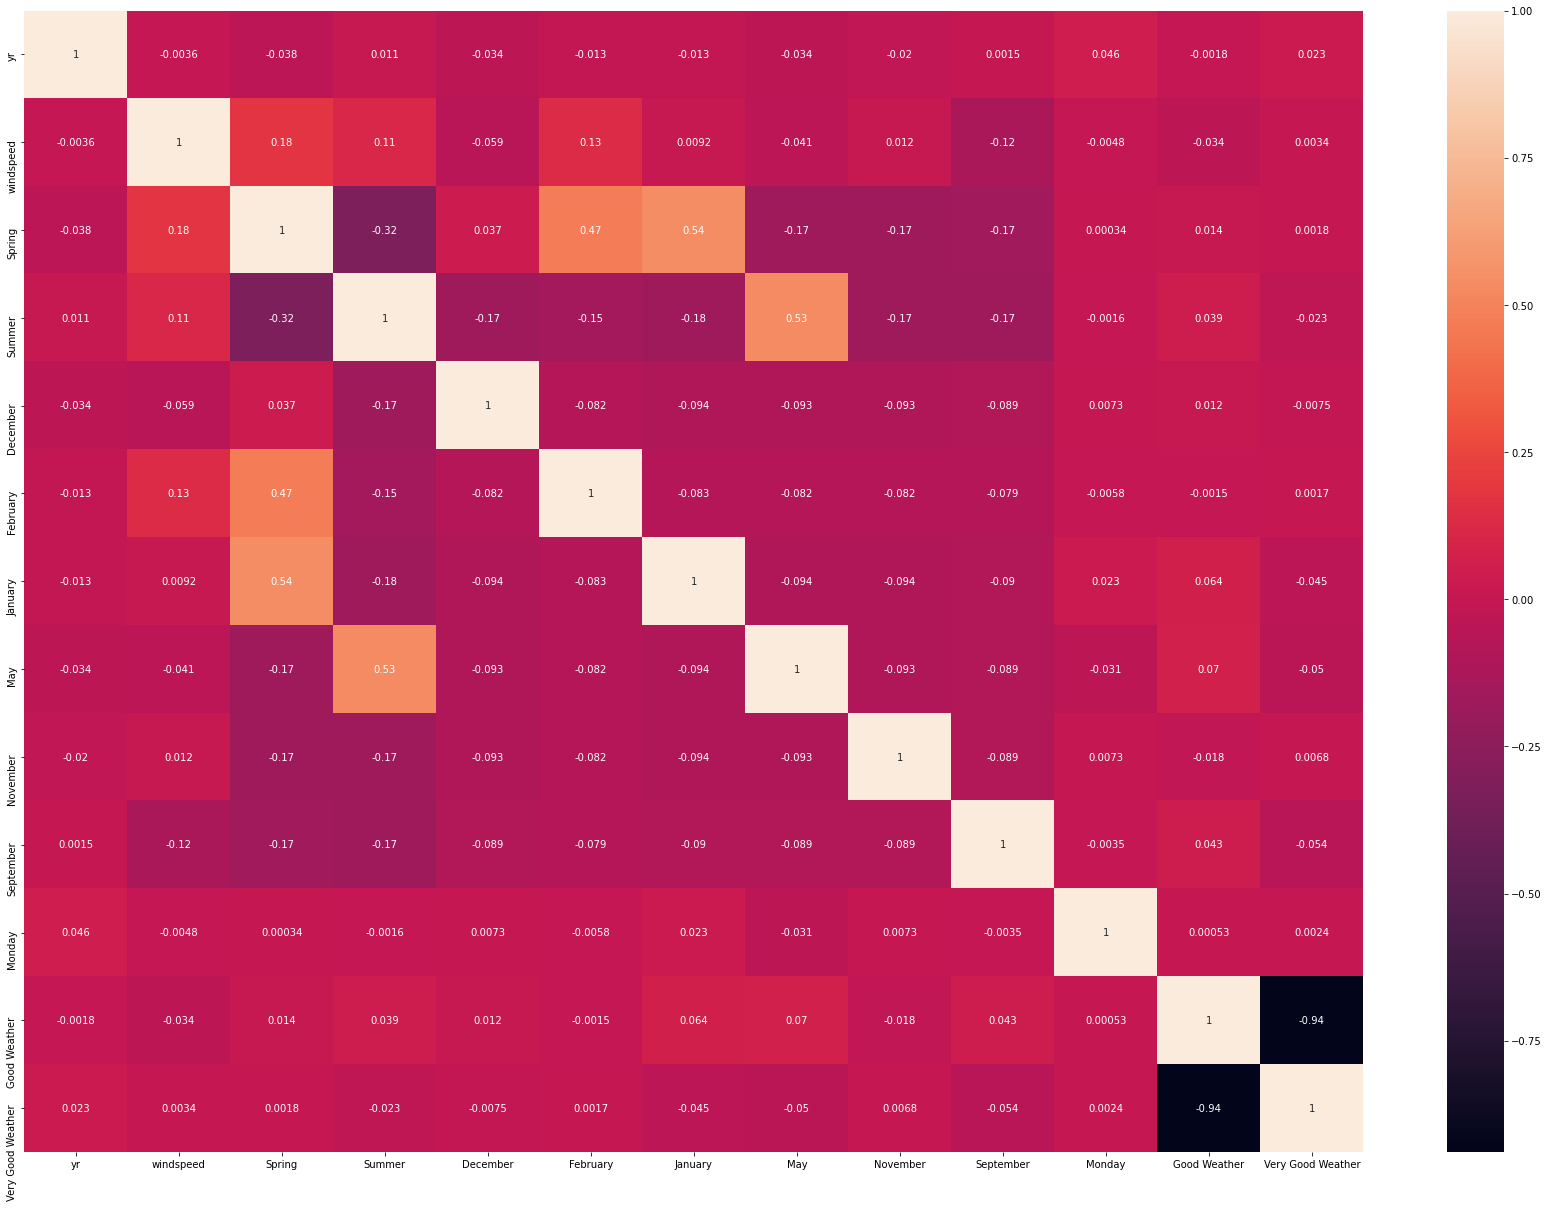

In [66]:
#heatmap
plt.figure(figsize=(30,21))
sns.heatmap(X_train_final.corr(),annot=True)
plt.show()

# Residual Analysis

Text(0.5, 1.0, ' Residual Plot')

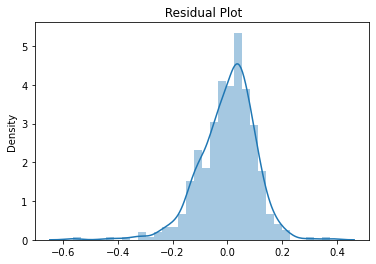

In [67]:
y_train_pred=lr_model.predict(X_train_sm_final)
res=y_train-y_train_pred
sns.distplot(res)
plt.title(" Residual Plot")

# Predictions and evaluations on the test set

In [68]:
#Create a list of numeric variables
num_vars=['temp','hum','windspeed','cnt']

#Transform data
df_test[num_vars]=scaler.transform(df_test[num_vars])
df_test.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,Spring,Summer,Winter,...,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Good Weather,Very Good Weather
184,0,1,0,0.831783,0.657364,0.084219,0.692706,0,0,0,...,0,0,1,0,0,0,0,0,1,0
535,1,0,1,0.901354,0.610133,0.153728,0.712034,0,1,0,...,0,0,0,0,0,0,0,1,0,1
299,0,0,1,0.511964,0.837699,0.334206,0.303382,0,0,1,...,1,0,0,0,0,1,0,0,1,0
221,0,0,1,0.881625,0.437098,0.339570,0.547400,0,0,0,...,0,0,0,0,0,0,0,1,0,1
152,0,0,1,0.817246,0.314298,0.537414,0.569029,0,1,0,...,0,0,0,0,0,1,0,0,0,1


In [69]:
y_test=df_test.pop('cnt')
X_test=df_test

In [70]:
# add constant
X_test_sm=sm.add_constant(X_test)
X_test.head()

,yr,holiday,workingday,temp,hum,windspeed,Spring,Summer,Winter,August,...,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Good Weather,Very Good Weather
184,0,1,0,0.831783,0.657364,0.084219,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
535,1,0,1,0.901354,0.610133,0.153728,0,1,0,0,...,0,0,0,0,0,0,0,1,0,1
299,0,0,1,0.511964,0.837699,0.334206,0,0,1,0,...,1,0,0,0,0,1,0,0,1,0
221,0,0,1,0.881625,0.437098,0.339570,0,0,0,1,...,0,0,0,0,0,0,0,1,0,1
152,0,0,1,0.817246,0.314298,0.537414,0,1,0,0,...,0,0,0,0,0,1,0,0,0,1


In [71]:
X_test_sm=X_test_sm.drop(["March","June","Wednesday","October","Thursday","Sunday","August","Tuesday","temp","Winter","hum","holiday","July","workingday","Saturday"],axis=1)

In [72]:
#predict
y_test_pred=lr_model.predict(X_test_sm)
r2_score(y_true=y_test, y_pred=y_test_pred)

0.7875386022228215

## Model Evaluation

Text(0, 0.5, 'y_test_pred')

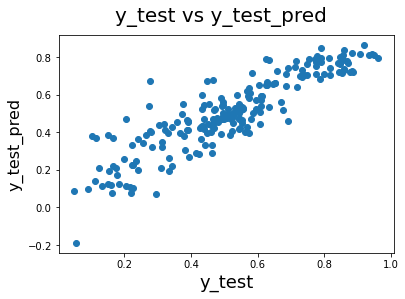

In [73]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_test_pred)
fig.suptitle('y_test vs y_test_pred', fontsize=20)               
plt.xlabel('y_test', fontsize=18)                          
plt.ylabel('y_test_pred', fontsize=16)                          

In [86]:
print(lr_model.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.801
Model:                            OLS   Adj. R-squared:                  0.796
Method:                 Least Squares   F-statistic:                     156.2
Date:                Wed, 12 Jan 2022   Prob (F-statistic):          3.21e-167
Time:                        15:23:53   Log-Likelihood:                 456.50
No. Observations:                 518   AIC:                            -885.0
Df Residuals:                     504   BIC:                            -825.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.2760      0.02

Equation for the best fitted line is:

cnt = 0.2495*yr - 0.1825*windspeed - 0.2010*Spring - 0.0623*Summer - 0.1317*December - 0.1044*February - 0.1660*January + 0.0521*May - 0.1232*November + 0.0512*September - 0.0241*Monday + 0.2259*Good Weather + 0.3113*Very Good Weather

# Building Linear Regression model using sklearn

In [74]:
## Use of SK Learn to predict the R2 Values and Compare with Predicted Values
lm = LinearRegression()
lm.fit(X_train_sm_final,y_train)

LinearRegression()

In [75]:
print(lm.intercept_)
print(lm.coef_)

0.27601943061936673
[ 0.          0.24954221 -0.18248572 -0.20097624 -0.06229906 -0.13167211
 -0.10442664 -0.16599322  0.05212782 -0.12321345  0.05121256 -0.02411961
  0.22586868  0.31126513]


In [76]:
r2 = r2_score(y_true = y_test, y_pred = y_test_pred)
r3 = r2_score(y_true = y_train, y_pred = y_train_pred)
print(r2)
print(r3)

0.7875386022228215
0.8011014538163406


## Model Selection using RFE

In [77]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [78]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 19)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [79]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('Spring', True, 1),
 ('Summer', True, 1),
 ('Winter', True, 1),
 ('August', False, 4),
 ('December', True, 1),
 ('February', True, 1),
 ('January', True, 1),
 ('July', True, 1),
 ('June', False, 9),
 ('March', False, 10),
 ('May', True, 1),
 ('November', True, 1),
 ('October', False, 5),
 ('September', True, 1),
 ('Monday', False, 3),
 ('Saturday', True, 1),
 ('Sunday', False, 2),
 ('Thursday', False, 7),
 ('Tuesday', False, 6),
 ('Wednesday', False, 8),
 ('Good Weather', True, 1),
 ('Very Good Weather', True, 1)]

In [80]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'Spring',
       'Summer', 'Winter', 'December', 'February', 'January', 'July', 'May',
       'November', 'September', 'Saturday', 'Good Weather',
       'Very Good Weather'],
      dtype='object')

In [81]:
X_train.columns[~rfe.support_]

Index(['August', 'June', 'March', 'October', 'Monday', 'Sunday', 'Thursday',
       'Tuesday', 'Wednesday'],
      dtype='object')

In [82]:
### Building model using statsmodel, for the detailed statistics

In [83]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [84]:
X_train_rfe = sm.add_constant(X_train_rfe)

lm = sm.OLS(y_train,X_train_rfe).fit() 

lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.848
Method:                 Least Squares   F-statistic:                     152.7
Date:                Wed, 12 Jan 2022   Prob (F-statistic):          1.14e-193
Time:                        11:34:33   Log-Likelihood:                 535.73
No. Observations:                 518   AIC:                            -1031.
Df Residuals:                     498   BIC:                            -946.5
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.0363      0.049      0.740      0.460      -0.060       0.133
yr                    0.2327      0.008     29.534      0.000       0.217       0.248
holiday              -0.0488      0.027     -1.824      0.069      -0.101       0.004
workingday            0.0447      0.011      3.974      0.000       0.023       0.067
temp                  0.4577      0.038     12.140      0.000       0.384       0.532
hum                  -0.1543      0.037     -4.139      0.000      -0.228      -0.081
windspeed            -0.1859      0.025     -7.407      0.000      -0.235      -0.137
Spring               -0.0557      0.022     -2.576      0.010      -0.098      -0.013
Summer                0.0301      0.017      1.796      0.073      -0.003       0.063
Winter                0.1050      0.017      6.063      0.000       0.071       0.139
December             -0.0487      0.018     -2.742      0.006      -0.084      -0.014
February             -0.0323      0.021     -1.537      0.125      -0.074       0.009
January              -0.0622      0.021     -2.974      0.003      -0.103      -0.021
July                 -0.0517      0.018     -2.898      0.004      -0.087      -0.017
May                   0.0225      0.017      1.321      0.187      -0.011       0.056
November             -0.0494      0.018     -2.673      0.008      -0.086      -0.013
September             0.0714      0.017      4.318      0.000       0.039       0.104
Saturday              0.0553      0.014      3.883      0.000       0.027       0.083
Good Weather          0.1977      0.024      8.070      0.000       0.150       0.246
Very Good Weather     0.2560      0.026      9.866      0.000       0.205       0.307
==============================================================================
Omnibus:                       87.249   Durbin-Watson:                   2.043
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              251.719
Skew:                          -0.807   Prob(JB):                     2.19e-55
Kurtosis:                       6.010   Cond. No.                         29.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [85]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,162.22
19,Very Good Weather,10.61
18,Good Weather,9.14
7,Spring,5.79
4,temp,4.83
9,Winter,3.82
8,Summer,3.51
12,January,2.34
5,hum,1.97
11,February,1.87
